In [1]:
import numpy as np ######## LİNEER REGRASYON ########
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [61]:
data=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/audiA3data.csv',on_bad_lines ='skip',delimiter=';')

data.head(5)


,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,1.250.000 TL,Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,83.400 km,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,1.198.950 TL,Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,69.800 km,Yarı Otomatik,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,945.000 TL,Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,191.000 km,Otomatik,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,1.120.000 TL,Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,181.000 km,Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,1.065.000 TL,Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,16.200 km,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [16]:
data.shape

(732, 18)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          732 non-null    object
 1   marka          732 non-null    object
 2   seri           732 non-null    object
 3   model          732 non-null    object
 4   yil            732 non-null    int64 
 5   km             732 non-null    object
 6   vites          732 non-null    object
 7   yakit          732 non-null    object
 8   kasa           732 non-null    object
 9   renk           731 non-null    object
 10  motorHacmi     731 non-null    object
 11  motorGucu      731 non-null    object
 12  cekis          732 non-null    object
 13  yakitTuketimi  732 non-null    object
 14  yakitDeposu    732 non-null    object
 15  boyaDegisen    732 non-null    object
 16  takas          732 non-null    object
 17  kimden         732 non-null    object
dtypes: int64(1), object(17)
memory

In [62]:
# DataFrame'deki 'Column1' sütununun veri tipini değiştirelim (int -> float)
data['fiyat'] = data['fiyat'].str.replace('.',',')

data['fiyat'] = data['fiyat'].str.replace(' TL', '.00')
data['km'] = data['km'].str.replace('.',',')
data['km'] = data['km'].str.replace(' km', '.00')

<ipython-input-62-89e2ea89f0ab>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['fiyat'] = data['fiyat'].str.replace('.',',')
<ipython-input-62-89e2ea89f0ab>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['km'] = data['km'].str.replace('.',',')


In [63]:
data = data[data['boyaDegisen'] != "-"]
data = data[data['motorGucu'] != "-"]
data = data[data['motorHacmi'] != "-"]
data = data[data['kasa'] != "-"]
data = data[data['yakit'] != "-"]
data = data[data['vites'] != "-"]
data = data[data['km'] != "-"]
data = data[data['yil'] != "-"]
data = data[data['model'] != "-"]


In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['fiyat'] = le.fit_transform(data['fiyat'])
data['model'] = le.fit_transform(data['model'])
data['yil'] = le.fit_transform(data['yil'])
data['km'] = le.fit_transform(data['km'])
data['vites'] = le.fit_transform(data['vites'])
data['yakit'] = le.fit_transform(data['yakit'])
data['kasa'] = le.fit_transform(data['kasa'])
data['motorHacmi'] = le.fit_transform(data['motorHacmi'])
data['motorGucu'] = le.fit_transform(data['motorGucu'])
data['boyaDegisen'] = le.fit_transform(data['boyaDegisen'])
data.head()


,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,86,Audi,A3,20,21,346,2,0,7,Mavi (metalik),19,6,Önden Çekiş,"4,4 lt",50 lt,51,Takasa Uygun,Galeriden
1,68,Audi,A3,6,18,327,2,0,7,Beyaz,7,11,Önden Çekiş,"4,7 lt",50 lt,51,Takasa Uygun,Galeriden
2,321,Audi,A3,46,15,148,1,1,3,Kırmızı,8,0,-,-,-,47,Takasa Uygun,Galeriden
3,43,Audi,A3,16,19,132,2,1,7,Siyah,11,4,Önden Çekiş,"3,7 lt",50 lt,47,Takasa Uygun,Galeriden
4,21,Audi,A3,14,19,99,2,1,7,Beyaz,11,6,Önden Çekiş,"3,9 lt",50 lt,30,Takasa Uygun Değil,Galeriden


In [65]:
x=data.drop(['fiyat','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)
y=data['fiyat'].values
x

,model,yil,km,vites,yakit,kasa,motorHacmi,motorGucu,boyaDegisen
0,20,21,346,2,0,7,19,6,51
1,6,18,327,2,0,7,7,11,51
2,46,15,148,1,1,3,8,0,47
3,16,19,132,2,1,7,11,4,47
4,14,19,99,2,1,7,11,6,30
...,...,...,...,...,...,...,...,...,...
726,9,19,45,2,1,7,11,4,47
727,11,16,29,2,1,7,11,4,51
728,38,12,75,0,3,3,10,2,47
729,36,1,214,1,0,3,10,1,47


In [53]:
# df = pd.DataFrame(data)

# # Belirli bir koşulu sağlayan satırları çıkaralım (örneğin, 'Column1' değeri 2 olan satırları)
# data = df[df['fiyat'] <= 10000]

In [54]:
data.shape

(697, 18)

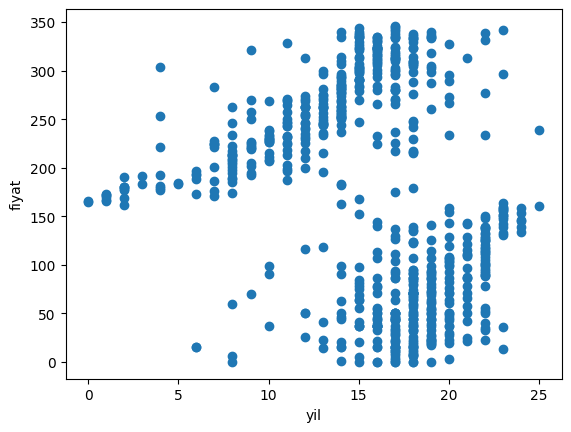

In [67]:
plt.scatter(x['yil'],y)
plt.xlabel('yil')
plt.ylabel('fiyat')
plt.show()

In [68]:
x=np.reshape(x,(732,-1))
y=np.reshape(y,(732,-1))


ValueError: ignored

In [69]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=10)

In [70]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
# Label Encoder Auid= 0 vs Vites= 0 manuel, yarıoto 1 tam 2 gibi

LinearRegression()

In [71]:
lin_reg.coef_

array([ 7.39369941e-01, -7.27525074e+00,  3.00541598e-02,  3.01497596e+01,
       -3.41277798e+00,  8.40743768e-01, -7.27074285e+00, -9.72868233e-01,
       -1.47459916e-01])

In [72]:
lin_reg.intercept_

287.00754666699515

In [73]:
lin_reg.score(X_train,y_train)

0.12455129420192845

In [74]:
lin_reg.score(X_test,y_test)

0.2520251723903235

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Veriyi ölçeklendirme (standartlaştırma)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modelini oluşturmak ve eğitmek
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapmak
y_pred = logreg.predict(X_test_scaled)

In [76]:
x

,model,yil,km,vites,yakit,kasa,motorHacmi,motorGucu,boyaDegisen
0,20,21,346,2,0,7,19,6,51
1,6,18,327,2,0,7,7,11,51
2,46,15,148,1,1,3,8,0,47
3,16,19,132,2,1,7,11,4,47
4,14,19,99,2,1,7,11,6,30
...,...,...,...,...,...,...,...,...,...
726,9,19,45,2,1,7,11,4,47
727,11,16,29,2,1,7,11,4,51
728,38,12,75,0,3,3,10,2,47
729,36,1,214,1,0,3,10,1,47


In [77]:
# Yeni bir aracın satış olasılığını tahmin etmek
#le.fit_transform(x['boyaDegisen'])
new_car = [[21,2017,355,2,0,8,22,7,53]]  # model	yil	km	vites	yakit	kasa	motorHacmi	motorGucu	boyaDegisen
new_car_scaled = scaler.transform(new_car)
prediction = logreg.predict_proba(new_car_scaled)[:, 1]

print(f"Yeni aracın satış olasılığı: {prediction[0]}")

Yeni aracın satış olasılığı: 3.433e-319


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Ortalama Kare Hatası: 25197.67935113617
Katsayılar: [ 7.39369941e-01 -7.27525074e+00  3.00541598e-02  3.01497596e+01
 -3.41277798e+00  8.40743768e-01 -7.27074285e+00 -9.72868233e-01
 -1.47459916e-01]
Sabit: 287.00754666699515


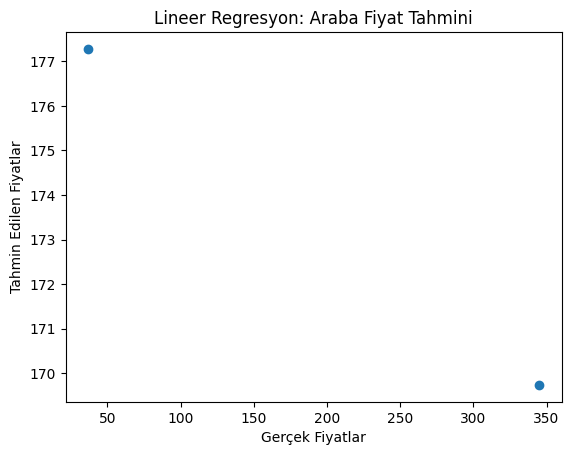

In [78]:
# Gerekli kütüphaneleri içe aktarın
from sklearn.metrics import mean_squared_error

# Test seti üzerinde tahminler yapın
#y_pred = lin_reg.predict(X_test)

# Veriyi eğitim ve test setlerine ayırın
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.002,random_state=50)

# Lineer regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = model.predict(X_test)

# Modelin performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hatası: {mse}")

# Katsayıları ve sabiti yazdırın
print("Katsayılar:", lin_reg.coef_)
print("Sabit:", lin_reg.intercept_)

# Gerçek ve tahmin edilen fiyatları karşılaştıran bir grafik çizin
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Lineer Regresyon: Araba Fiyat Tahmini")
plt.show()


In [79]:
corr=data.corr()
corr['fiyat'].sort_values(ascending=False)

<ipython-input-79-1e1f97ad269f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


fiyat          1.000000
model          0.165160
yakit          0.064347
km            -0.008290
motorGucu     -0.057374
vites         -0.090986
boyaDegisen   -0.112800
kasa          -0.209942
motorHacmi    -0.222159
yil           -0.274197
Name: fiyat, dtype: float64

<Axes: xlabel='yil', ylabel='fiyat'>

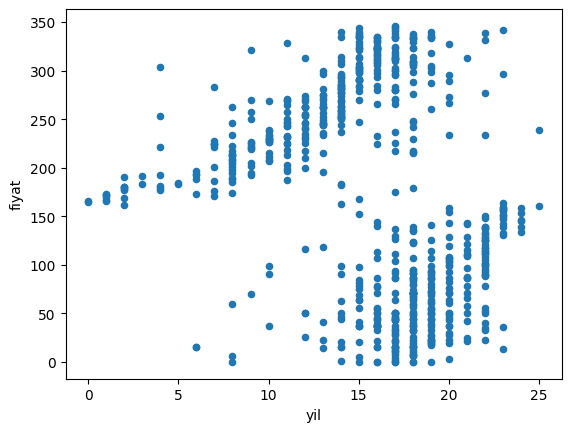

In [80]:
data.plot(kind='scatter',x='yil',y='fiyat')

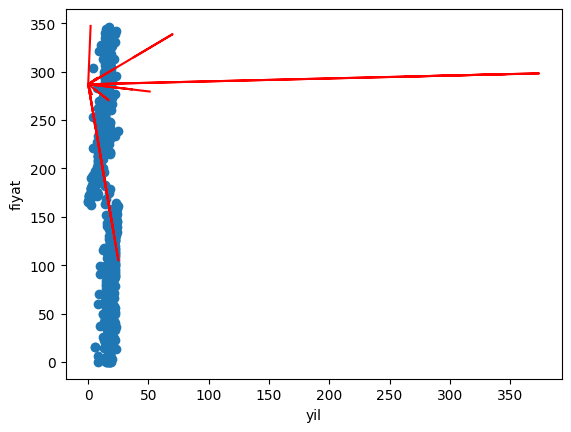

In [81]:
plt.scatter(x['yil'],y)
plt.xlabel('yil')
plt.ylabel('fiyat')
plt.plot(x,lin_reg.coef_*x+lin_reg.intercept_,'r')
plt.show()

In [ ]:
################### LİNEER REGRASYON SONU ######################

In [ ]:
################### METRİCS ####################

In [82]:
from sklearn.metrics import mean_squared_error

pred=model.predict(X_test)
result=mean_squared_error(y_test,pred)
result

25197.67935113617

In [83]:
data.columns

Index(['fiyat', 'marka', 'seri', 'model', 'yil', 'km', 'vites', 'yakit',
       'kasa', 'renk', 'motorHacmi', 'motorGucu', 'cekis', 'yakitTuketimi',
       'yakitDeposu', 'boyaDegisen', 'takas', 'kimden'],
      dtype='object')

In [84]:
x=data['yil']
y=data['fiyat']
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]
x

array([[ 1.        ,  1.12077815],
       [ 1.        ,  0.49315439],
       [ 1.        , -0.13446937],
       ...,
       [ 1.        , -0.76209312],
       [ 1.        , -3.06338022],
       [ 1.        , -2.43575647]])

In [85]:
alpha=0.01
iterations=1000
m=y.size
np.random.seed(58)
theta=np.random.rand(2)
print(theta)

def gradient_descent(x,y,theta,iterations,alpha):
    past_cost=[]
    past_thetas=[theta]
    for i in range(iterations):
        prediction=np.dot(x,theta)
        error=prediction-y
        cost=1/(2*m)*np.dot(error.T,error)
        past_cost.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(x.T,error))
        past_thetas.append(theta)
    return past_thetas,past_cost

past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theata=past_thetas[-1]

print(theata[0],' ',theata[1])

[0.36510558 0.45120592]
168.05875727387962   -29.456898230129195


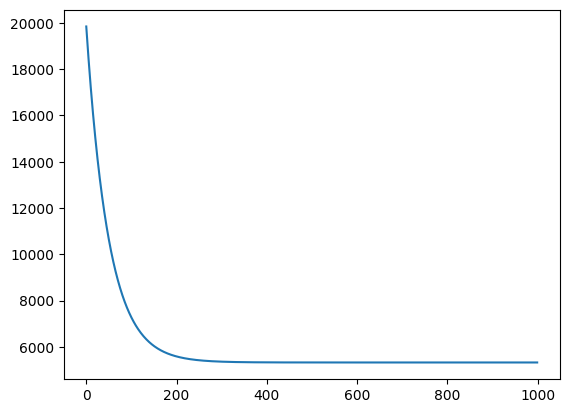

In [86]:
plt.plot(past_costs)
plt.show()

In [87]:
import pandas as pd
import numpy as np

In [115]:
df=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a3data.csv',on_bad_lines ='skip',delimiter=';')

df.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000 TL,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000 km,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000 TL,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000 km,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900 TL,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000 km,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000 TL,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000 km,Otomatik,Benzin,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden
4,1.050.000 TL,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000 km,Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [89]:
df.shape

(701, 18)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          701 non-null    object
 1   marka          701 non-null    object
 2   seri           701 non-null    object
 3   model          701 non-null    object
 4   yil            701 non-null    int64 
 5   km             701 non-null    object
 6   vites          701 non-null    object
 7   yakit          701 non-null    object
 8   kasa           701 non-null    object
 9   renk           701 non-null    object
 10  motorHacmi     701 non-null    object
 11  motorGucu      701 non-null    object
 12  cekis          701 non-null    object
 13  yakitTuketimi  701 non-null    object
 14  yakitDeposu    701 non-null    object
 15  boyaDegisen    701 non-null    object
 16  takas          701 non-null    object
 17  kimden         701 non-null    object
dtypes: int64(1), object(17)
memory

In [102]:
df.isnull().values.any()

False

In [116]:
df.groupby('vites').mean()

<ipython-input-116-53fbc9e8b2fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('vites').mean()


,yil
vites,
Düz,2006.818182
Otomatik,2009.235294
Yarı Otomatik,2015.189239


In [117]:
df['vites'].replace('Düz',0,inplace=True)
df['vites'].replace('Otomatik',1,inplace=True)
df['vites'].replace('Yarı Otomatik',2,inplace=True)

In [118]:
# df['fiyat'] = df['fiyat'].str.replace('.',',')

# df['fiyat'] = df['fiyat'].str.replace(' TL', '.00')
# df['km'] = df['km'].str.replace('.',',')
# df['km'] = df['km'].str.replace(' km', '.00')

df['fiyat'] = df['fiyat'].str.replace(' TL', '')
df['km'] = df['km'].str.replace(' km', '')


In [119]:
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000,2,Dizel,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000,2,Benzin,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000,2,Dizel,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000,1,Benzin,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden
4,1.050.000,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000,2,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fiyat'] = le.fit_transform(df['fiyat'])
df['model'] = le.fit_transform(df['model'])
df['yil'] = le.fit_transform(df['yil'])
df['km'] = le.fit_transform(df['km'])
df['vites'] = le.fit_transform(df['vites'])
df['yakit'] = le.fit_transform(df['yakit'])
df['kasa'] = le.fit_transform(df['kasa'])
df['motorHacmi'] = le.fit_transform(df['motorHacmi'])
df['motorGucu'] = le.fit_transform(df['motorGucu'])
df['boyaDegisen'] = le.fit_transform(df['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,283,Audi,A3,46,17,235,2,1,3,Beyaz,9,6,Önden Çekiş,"3,9 lt",50 lt,31,Takasa Uygun,Galeriden
1,329,Audi,A3,33,17,21,2,0,3,Beyaz,5,10,Önden Çekiş,"4,9 lt",50 lt,2,Takasa Uygun Değil,Galeriden
2,299,Audi,A3,12,17,171,2,1,4,Beyaz,9,6,Önden Çekiş,"3,9 lt",50 lt,44,Takasa Uygun,Galeriden
3,221,Audi,A3,37,10,101,1,0,3,Siyah,8,3,Önden Çekiş,"7,6 lt",55 lt,5,Takasa Uygun,Galeriden
4,14,Audi,A3,13,18,161,2,1,4,Siyah,9,6,Önden Çekiş,"3,9 lt",50 lt,44,Takasa Uygun,Galeriden


In [121]:
X=df[['fiyat','km']]
y=df['vites']

In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=58)

In [123]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

model=lg.fit(X_train,y_train)

In [124]:
model.coef_

array([[ 2.22932174e-03,  1.27424703e-03],
       [ 2.47844849e-05,  6.13139496e-04],
       [-2.25410622e-03, -1.88738653e-03]])

In [125]:
model.score(X_test,y_test)

0.7943262411347518

In [126]:
model.score(X_train,y_train)

0.7625

In [127]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report

pred=model.predict(X_test)

confusion_matrix(y_test,pred)

array([[  0,   0,  13],
       [  0,   0,  16],
       [  0,   0, 112]])

In [128]:
recall_score(y_test,pred)

ValueError: ignored

In [129]:
112/(112+0)

1.0

In [131]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.79      1.00      0.89       112

    accuracy                           0.79       141
   macro avg       0.26      0.33      0.30       141
weighted avg       0.63      0.79      0.70       141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
model.predict([[85,165]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
################### confusion_matrix ###############

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a3data.csv',on_bad_lines ='skip',delimiter=';')

df.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000 TL,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000 km,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000 TL,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000 km,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900 TL,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000 km,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000 TL,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000 km,Otomatik,Benzin,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden
4,1.050.000 TL,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000 km,Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [136]:
df.shape

(701, 18)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          701 non-null    object
 1   marka          701 non-null    object
 2   seri           701 non-null    object
 3   model          701 non-null    object
 4   yil            701 non-null    int64 
 5   km             701 non-null    object
 6   vites          701 non-null    object
 7   yakit          701 non-null    object
 8   kasa           701 non-null    object
 9   renk           701 non-null    object
 10  motorHacmi     701 non-null    object
 11  motorGucu      701 non-null    object
 12  cekis          701 non-null    object
 13  yakitTuketimi  701 non-null    object
 14  yakitDeposu    701 non-null    object
 15  boyaDegisen    701 non-null    object
 16  takas          701 non-null    object
 17  kimden         701 non-null    object
dtypes: int64(1), object(17)
memory

In [138]:
df.groupby('yakit').mean()

<ipython-input-138-3323f8761700>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('yakit').mean()


,yil
yakit,
Benzin,2013.779412
Dizel,2015.027848
Hibrit,2021.636364
LPG & Benzin,2005.626374


In [139]:
df['yakit'].replace('Benzin',0,inplace=True)
df['yakit'].replace('Dizel',1,inplace=True)
df['yakit'].replace('Hibrit',2,inplace=True)
df['yakit'].replace('LPG & Benzin',3,inplace=True)

<Axes: xlabel='yakit', ylabel='count'>

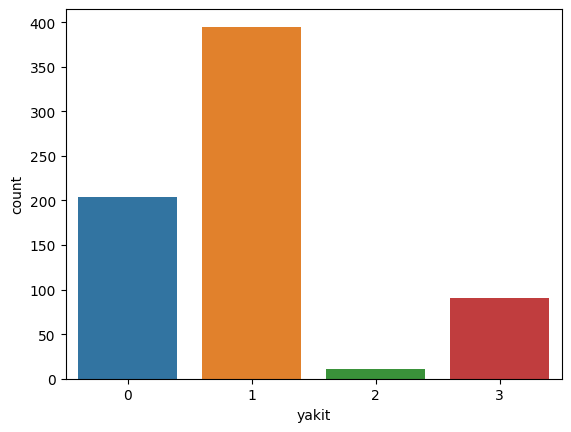

In [140]:
sns.countplot(x='yakit',data=df)

<Axes: xlabel='yil', ylabel='Count'>

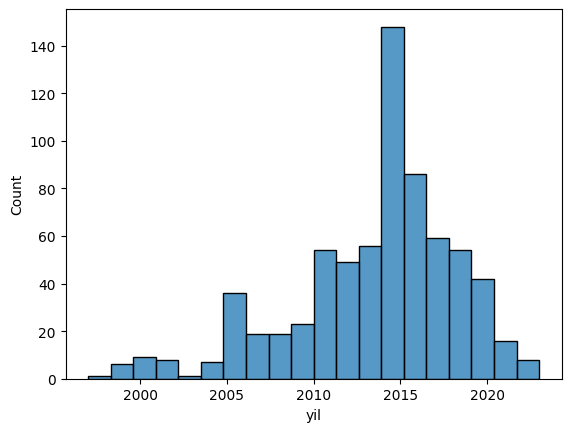

In [141]:
sns.histplot(df['yil'])

In [143]:
df['fiyat'] = df['fiyat'].str.replace(' TL', '')
df['km'] = df['km'].str.replace(' km', '.')
df['vites'] = df['vites'].str.replace(',', '.')
df['kasa'] = df['kasa'].str.replace(',', '.')
df['motorHacmi'] = df['motorHacmi'].str.replace(',', '.')
df['motorGucu'] = df['motorGucu'].str.replace(',', '.')
df['boyaDegisen'] = df['boyaDegisen'].str.replace(',', '.')

In [144]:
x=df.drop(['yakit','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=df['yakit']
x

,fiyat,model,yil,km,vites,kasa,motorHacmi,motorGucu,boyaDegisen
0,875.000,A3 Sportback 1.6 TDI Attraction,2015,275.000.,Yarı Otomatik,Hatchback/5,1598 cc,110 hp,4 boyalı
1,996.000,A3 Sportback 1.4 TFSI Ambition,2015,115.000.,Yarı Otomatik,Hatchback/5,1395 cc,125 hp,1 değişen
2,915.900,A3 Sedan 1.6 TDI Ambiente,2015,210.000.,Yarı Otomatik,Sedan,1598 cc,110 hp,Belirtilmemiş
3,655.000,A3 Sportback 1.6 Attraction,2008,160.000.,Otomatik,Hatchback/5,1595 cc,102 hp,1 değişen. 2 boyalı
4,1.050.000,A3 Sedan 1.6 TDI Ambition,2016,203.000.,Yarı Otomatik,Sedan,1598 cc,110 hp,Belirtilmemiş
...,...,...,...,...,...,...,...,...,...
696,815.000,A3 Sportback 1.6 TDI Attraction,2012,133.500.,Yarı Otomatik,Hatchback/5,1598 cc,105 hp,1 boyalı
697,505.000,A3 Sportback 1.6 Ambition,2004,247.000.,Düz,Hatchback/3,1401 - 1600 cm3,101 - 125 HP,-
698,645.000,A3 Sportback 1.6 Standart,2008,231.000.,Otomatik,Hatchback/3,1595 cc,102 hp,Belirtilmemiş
699,1.520.000,A3 Sportback 35 TFSI Sport,2020,5.000.,Otomatik,Hatchback/5,-,-,Tamamı orjinal


In [145]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['fiyat'] = le.fit_transform(x['fiyat'])
x['yil'] = le.fit_transform(x['yil'])
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000.,Yarı Otomatik,1,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000.,Yarı Otomatik,0,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000.,Yarı Otomatik,1,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000.,Otomatik,0,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,1 değişen. 2 boyalı,Takasa Uygun,Galeriden
4,1.050.000,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000.,Yarı Otomatik,1,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [ ]:
x

,fiyat,model,yil,km,vites,kasa,motorHacmi,motorGucu,boyaDegisen
0,270,21,21,97,2,8,22,7,53
1,252,7,18,78,2,8,10,12,53
2,159,47,15,268,1,4,11,1,49
3,228,17,19,254,2,8,14,5,49
4,208,15,19,7,2,8,14,7,31
...,...,...,...,...,...,...,...,...,...
727,270,12,16,153,2,8,14,5,53
728,92,39,12,200,0,4,13,3,49
729,8,37,1,330,1,4,13,2,49
730,12,39,4,370,0,5,13,2,37


In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [147]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [148]:
logreg.coef_

array([[-1.49552771e-03, -3.92051962e-02, -8.80994202e-02,
         1.45458712e-04, -1.85389699e-01, -4.01953368e-01,
         1.44871543e-01,  3.93383394e-01,  7.15553410e-03],
       [-2.43229563e-03,  1.19057363e-02,  9.92420471e-02,
        -3.80104280e-03,  1.21174783e+00,  1.33223404e+00,
         1.00544745e-01, -4.28150806e-01,  2.19293897e-03],
       [-1.04013434e-02, -4.53185593e-02,  5.77548026e-01,
        -1.18498780e-03, -7.09525038e-01, -1.39803089e+00,
        -3.29371161e-01,  1.54813808e-01, -9.13118176e-03],
       [ 1.43291668e-02,  7.26180193e-02, -5.88690653e-01,
         4.84057188e-03, -3.16833096e-01,  4.67750212e-01,
         8.39548729e-02, -1.20046395e-01, -2.17291313e-04]])

In [149]:
logreg.intercept_

array([ 2.77024857, -2.30073143, -1.114114  ,  0.64459686])

In [150]:
pred=logreg.predict(X_test)

In [151]:
pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 3, 1, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 3, 1, 3, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3,
       3, 3, 1, 1, 1, 0, 1, 1, 1])

In [152]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[32,  5,  0,  2],
       [ 0, 85,  0,  0],
       [ 2,  0,  0,  0],
       [ 1,  3,  0, 11]])

In [153]:
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(logreg,X_test,y_test,display_labels=["(0) Benzin", "(1) Dizel","(2) Hibrit", "(3) LPG & Benzin"],cmap=plt.cm.Blues)

ImportError: ignored

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.9143    0.8205    0.8649        39
           1     0.9140    1.0000    0.9551        85
           2     0.0000    0.0000    0.0000         2
           3     0.8462    0.7333    0.7857        15

    accuracy                         0.9078       141
   macro avg     0.6686    0.6385    0.6514       141
weighted avg     0.8939    0.9078    0.8985       141



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
from sklearn.metrics import recall_score,f1_score,accuracy_score

print(recall_score(y_test,pred))
print(f1_score(y_test,pred))
print(accuracy_score(y_test,pred))

ValueError: ignored

In [156]:
logreg.score(X_test,y_test)

0.9078014184397163

In [157]:
logreg.score(X_train,y_train)

0.8785714285714286

In [ ]:
################################## KNN ####################################

In [158]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [159]:
df=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a3data.csv',on_bad_lines ='skip',delimiter=';')

df.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000 TL,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000 km,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000 TL,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000 km,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900 TL,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000 km,Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000 TL,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000 km,Otomatik,Benzin,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden
4,1.050.000 TL,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000 km,Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [160]:
df.groupby('yakit').mean()

<ipython-input-160-3323f8761700>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('yakit').mean()


,yil
yakit,
Benzin,2013.779412
Dizel,2015.027848
Hibrit,2021.636364
LPG & Benzin,2005.626374


In [161]:
df['yakit'].replace('Benzin',0,inplace=True)
df['yakit'].replace('Dizel',1,inplace=True)
df['yakit'].replace('Hibrit',2,inplace=True)
df['yakit'].replace('LPG & Benzin',3,inplace=True)

In [162]:
df = df[df['boyaDegisen'] != "-"]
df = df[df['motorGucu'] != "-"]
df = df[df['motorHacmi'] != "-"]
df = df[df['kasa'] != "-"]
df = df[df['yakit'] != "-"]
df = df[df['vites'] != "-"]
df = df[df['km'] != "-"]
df = df[df['yil'] != "-"]
df = df[df['model'] != "-"]

In [163]:
x=df.drop(['yakit','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=df['yakit']


In [164]:
df.shape

(310, 18)

In [165]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['fiyat'] = le.fit_transform(x['fiyat'])
x['yil'] = le.fit_transform(x['yil'])
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000 TL,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000 km,Yarı Otomatik,1,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000 TL,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000 km,Yarı Otomatik,0,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900 TL,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000 km,Yarı Otomatik,1,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000 TL,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000 km,Otomatik,0,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden
4,1.050.000 TL,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000 km,Yarı Otomatik,1,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [166]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)

In [167]:
X_train.shape

(279, 9)

In [168]:
import math
k=math.sqrt(len(x))
knn=KNeighborsClassifier(n_neighbors=27,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [169]:
knn.score(X_test,y_test)

0.6451612903225806

In [170]:
knn.score(X_train,y_train)

0.7240143369175627

In [171]:
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[ 1,  5,  3],
       [ 0, 15,  0],
       [ 2,  1,  4]])

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.71      1.00      0.83        15
           3       0.57      0.57      0.57         7

    accuracy                           0.65        31
   macro avg       0.54      0.56      0.52        31
weighted avg       0.57      0.65      0.58        31



In [173]:
for k in range(3,101,2):
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    print("k:",k," Score:",knn.score(X_test,y_test))

k: 3  Score: 0.5806451612903226
k: 5  Score: 0.5161290322580645
k: 7  Score: 0.6774193548387096
k: 9  Score: 0.7096774193548387
k: 11  Score: 0.6774193548387096
k: 13  Score: 0.6451612903225806
k: 15  Score: 0.7419354838709677
k: 17  Score: 0.7419354838709677
k: 19  Score: 0.6774193548387096
k: 21  Score: 0.6129032258064516
k: 23  Score: 0.6129032258064516
k: 25  Score: 0.5806451612903226
k: 27  Score: 0.6451612903225806
k: 29  Score: 0.7096774193548387
k: 31  Score: 0.7096774193548387
k: 33  Score: 0.7096774193548387
k: 35  Score: 0.6774193548387096
k: 37  Score: 0.6129032258064516
k: 39  Score: 0.7096774193548387
k: 41  Score: 0.7419354838709677
k: 43  Score: 0.7419354838709677
k: 45  Score: 0.7419354838709677
k: 47  Score: 0.7419354838709677
k: 49  Score: 0.7419354838709677
k: 51  Score: 0.7419354838709677
k: 53  Score: 0.6774193548387096
k: 55  Score: 0.6451612903225806
k: 57  Score: 0.6129032258064516
k: 59  Score: 0.6451612903225806
k: 61  Score: 0.6451612903225806
k: 63  Score: 

In [174]:
y_pred

array([1, 1, 1, 0, 1, 1, 3, 1, 3, 1, 1, 0, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3,
       0, 1, 1, 1, 1, 1, 1, 1, 3])

In [175]:
x=df.drop('yakit',axis=1)
y=df['yakit']
x.shape

(310, 17)

In [176]:
from sklearn.preprocessing import LabelEncoder

x=df.drop(['yakit','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=df['yakit']

le = LabelEncoder()
x['fiyat'] = le.fit_transform(x['fiyat'])
x['yil'] = le.fit_transform(x['yil'])
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,875.000 TL,Audi,A3,A3 Sportback 1.6 TDI Attraction,2015,275.000 km,Yarı Otomatik,1,Hatchback/5,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,4 boyalı,Takasa Uygun,Galeriden
1,996.000 TL,Audi,A3,A3 Sportback 1.4 TFSI Ambition,2015,115.000 km,Yarı Otomatik,0,Hatchback/5,Beyaz,1395 cc,125 hp,Önden Çekiş,"4,9 lt",50 lt,1 değişen,Takasa Uygun Değil,Galeriden
2,915.900 TL,Audi,A3,A3 Sedan 1.6 TDI Ambiente,2015,210.000 km,Yarı Otomatik,1,Sedan,Beyaz,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
3,655.000 TL,Audi,A3,A3 Sportback 1.6 Attraction,2008,160.000 km,Otomatik,0,Hatchback/5,Siyah,1595 cc,102 hp,Önden Çekiş,"7,6 lt",55 lt,"1 değişen, 2 boyalı",Takasa Uygun,Galeriden
4,1.050.000 TL,Audi,A3,A3 Sedan 1.6 TDI Ambition,2016,203.000 km,Yarı Otomatik,1,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,9 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden


In [177]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [178]:
for k in range(3,101,2):
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    print("k:",k," Score:",knn.score(X_test,y_test))

k: 3  Score: 0.5483870967741935
k: 5  Score: 0.5806451612903226
k: 7  Score: 0.6290322580645161
k: 9  Score: 0.6290322580645161
k: 11  Score: 0.6451612903225806
k: 13  Score: 0.6290322580645161
k: 15  Score: 0.6290322580645161
k: 17  Score: 0.6612903225806451
k: 19  Score: 0.6451612903225806
k: 21  Score: 0.5967741935483871
k: 23  Score: 0.6129032258064516
k: 25  Score: 0.5645161290322581
k: 27  Score: 0.6129032258064516
k: 29  Score: 0.6129032258064516
k: 31  Score: 0.6290322580645161
k: 33  Score: 0.6290322580645161
k: 35  Score: 0.6451612903225806
k: 37  Score: 0.6451612903225806
k: 39  Score: 0.6290322580645161
k: 41  Score: 0.6612903225806451
k: 43  Score: 0.6451612903225806
k: 45  Score: 0.6129032258064516
k: 47  Score: 0.5967741935483871
k: 49  Score: 0.6290322580645161
k: 51  Score: 0.6451612903225806
k: 53  Score: 0.6290322580645161
k: 55  Score: 0.6451612903225806
k: 57  Score: 0.6451612903225806
k: 59  Score: 0.6451612903225806
k: 61  Score: 0.6451612903225806
k: 63  Score: 

In [179]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.31      0.27        16
           1       0.74      0.76      0.75        33
           2       0.00      0.00      0.00         0
           3       0.67      0.31      0.42        13

    accuracy                           0.55        62
   macro avg       0.41      0.34      0.36        62
weighted avg       0.59      0.55      0.56        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
cv=KFold(n_splits=3,random_state=1,shuffle=True)

knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

scores=cross_val_score(knn,x,y,scoring='recall',cv=cv)

print(np.mean(scores))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [182]:
print(scores)

[nan nan nan]


In [183]:
pred=cross_val_predict(knn,x,y,cv=cv)

In [184]:
pred

array([1, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 3, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 3, 3, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 0, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 0, 1, 3,
       0, 1, 1, 3, 1, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 0,
       3, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 0, 1, 3, 0, 1, 3, 0, 0, 1, 1,
       1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 3, 1, 0, 3, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0,
       1, 1, 1, 3, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 1,

In [185]:
from sklearn.model_selection import GridSearchCV

log=LogisticRegression(max_iter=200)

pram_grid={
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l1','l2'],

}
grid_search=GridSearchCV(log,pram_grid,cv=5,scoring='accuracy')
results=grid_search.fit(X_train,y_train)
print(results.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [186]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(max_iter=300,C=0.01,penalty='l2')
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.80      0.97      0.88        33
           3       1.00      0.62      0.76        13

    accuracy                           0.81        62
   macro avg       0.84      0.74      0.77        62
weighted avg       0.82      0.81      0.80        62



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors':np.arange(1,50),
    'weights':['uniform', 'distance'],
    'metric':['euclidean','cosine','infinity'],
}
grid_search=GridSearchCV(knn,param_grid,cv=5)
result=grid_search.fit(X_train,y_train)
print(result.best_params_)

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [188]:
math.sqrt(len(x))

17.60681686165901

In [189]:
knn=KNeighborsClassifier(n_neighbors=29,metric='euclidean',weights='distance')
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27        16
           1       0.71      0.91      0.80        33
           3       0.67      0.31      0.42        13

    accuracy                           0.61        62
   macro avg       0.56      0.49      0.50        62
weighted avg       0.59      0.61      0.58        62

